<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/13 - Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Las técnicas de clustering son utilizadas para poder encontrar patrones o grupos (denominados clusters) dentro de un conjunto de datos u observaciones. Las particiones se arman de forma que las obseraciones dentro del grupo sean lo más similares entre sí y lo más diferentes entre observaciones de otros agrupamientos. Es un algoritmo no supervidado ya que el proceso no tiene en cuenta un target para realizar dicho análisis. Existen muchas técnicas dentro del clustering, pero se pueden agrupar en tres grandes grupos: 


*   Partitioning Clustering: Este tipo de técnicas, requieren que el usuario detalle como un hiperparámetro la cantidad de agrupaciones que el usuario desea crear. (K-means, k-medoids, etc)
*   Hierarchical Clustering: este tipo de técnicas no se necesita que el usuario diga la cantidad de particiones se desea. (agglomerative clusterig, divisive clustering, etc)
*   Métodos que combinan o modifican los métodos anteriores ( hierarchical k-means, fuzzi clustering, etc)

## Métodos para el cálculo de las distancias
Uno de los elementos fundamentales en los modelos de clustering son las funciones que se utilizan para el cálculo de las distancias.


1.   Distancias euclídea: La distancia euclídea entre dos puntos p y q se define como la longitud del segmento que une ambos puntos. Se calcula usando el teorema de Pitágoras.  
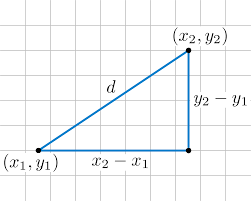  
2.   Distancia de Manhatan: se la conoce también como taxicab metric, se define como la distancia entre dos puntos p y q como la sumatoria de las diferencias absolutas entre cada dimensión. La diferencia es que es más robusta (es decir no se ve afectada por outliers)  
![](https://eloviparo.files.wordpress.com/2018/03/58000-eu3.jpg?w=271&h=192) 
3. Correlación: Esta medida es bastante utilizada y se calcula como 1 - correlacion(p,q). La correlación se puede ser calculada por Pearson, Spearman, etc.

## Elegir el número óptimo de clusters
### Método del codo
Este método busca probar un rango de valores del hiperparámentro y representa gráficamente los resultados obtenidos por cada uno de los valores. Así identifica gráficamente los resultados obtenidos e identifica el punto de la curva a partir del cual la mejora deja de ser notable. 
El método Elbow calcula la varianza total intra-cluster en función del número de clusters y escoge como óptimo aquel valor a partir del cual añadir más clusters apenas consigue mejoría.

### Average Silhouette
Este mpetodo considera como número óptimo de clusters aquel que maximiza la media el coeficiente de silhouette de todas las observaciones
Este coeficiente cuantifica cómo de buena es la signación que se ha hecho a una observaciones comparando su similitud con el resto de las observaciones de su cluster frende a los otros clusters. Su valor podrá encontrarse en el rango de -1 y 1, más próximos a 1 indica que la observación se ha asignado a un cluster correcto.

## K-means
Las observaciones son agrupadas en un número específico de k clusters de forma en la que la suma de las varianzas internas de los clusters sea lo menor posible.  

Las ventajas de este método son las sencillez y velocidad del algoritmo, pero presenta varias limitaciones. 
Primero en principal, se necesita de antemano conocer el número de clusters.


K-means es uno de los métodos de clustering más utilizados. Destaca por la sencillez y velocidad de su algoritmo, sin embargo, presenta una serie de limitaciones que se deben tener en cuenta. Los resultados dependerán de los centroides elegidos. Para poder minimizar este problema, se recomienda repetir este proceso entre 25 y 50 veces y ahi elegir el resultado que contenga la menor varianza posible. Tiene problemas con los outliers. La solución es exluirlos o trabajar sobre métodos más robustos.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

Obtenemos un data set de sklearn

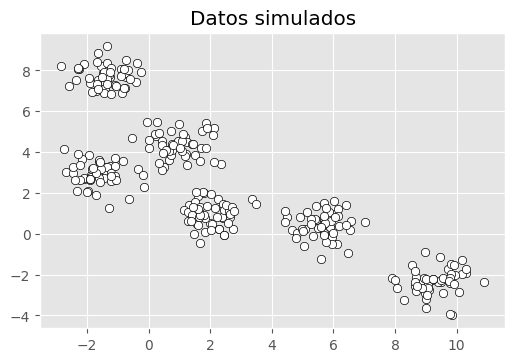

In [9]:
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 2, 
        centers      = 6, 
        cluster_std  = 0.60, 
        shuffle      = True, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

Creo un kmeans de 4 clusters

In [13]:
modelo_kmeans = KMeans(n_clusters=6, n_init=25, random_state=123)
modelo_kmeans.fit(X=X)

KMeans(n_clusters=6, n_init=25, random_state=123)

Predecimos los grupos

In [14]:
y_predict = modelo_kmeans.predict(X=X)


Graficamos las observaciones por los clusters y los centroides

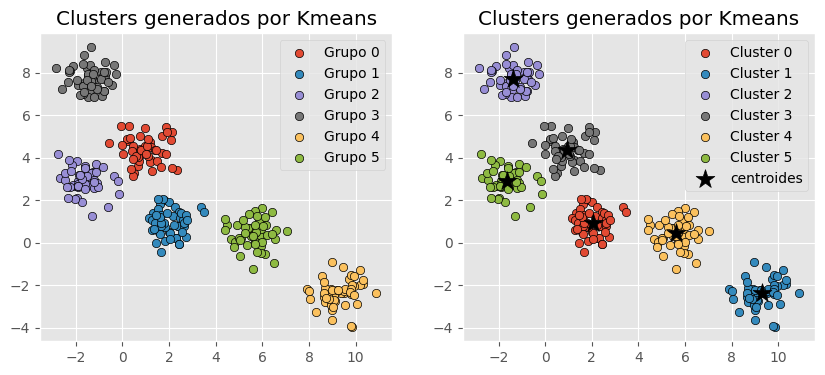

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X[y == i, 0],
        y = X[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por Kmeans')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X[y_predict == i, 0],
        y = X[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

Comparamos dos ejecuciones de k igual a 2 y k igual a 6

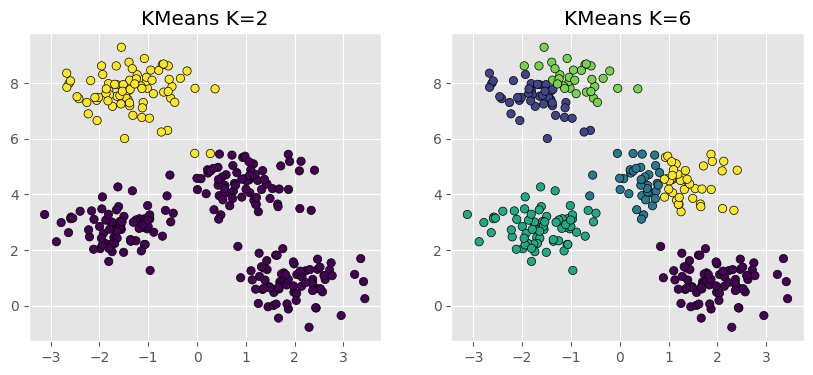

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Resultados para K = 2
# ==============================================================================
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X)
ax[0].scatter(
        x = X[:, 0],
        y = X[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Resultados para K = 6
# ==============================================================================
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X)
ax[1].scatter(
        x = X[:, 0],
        y = X[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

Método del codo para detectar el k óptimo



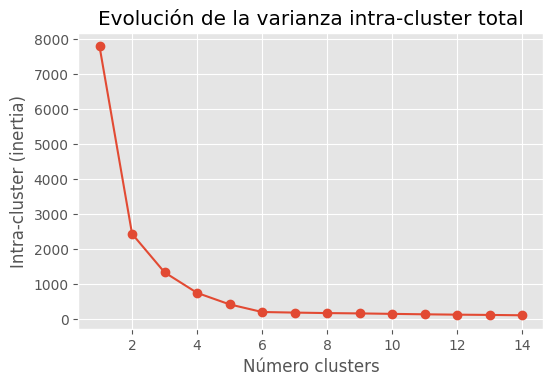

In [16]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Método silhouette para detectar el k óptimo


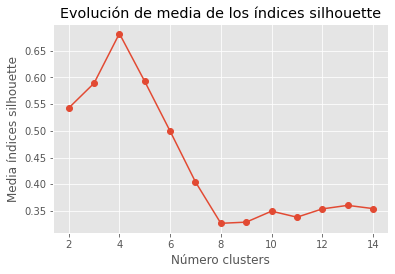

In [ ]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


## K-medoids
Este método es muy parecido al método de k-means, en ambos modelos se agrupan los resultados en k clusters. La diferencia entre las técnicas es que los centroides seleccionados en este método son elementos reales de las observaciones mientras que en el k-means los centroides se representan como la media de las observaciones presentes en el cluster. 
El medoid es el elemento dentro de un cluster cuya diferencia promedio entre el y el resto de los elementos es el menor posible. Este hecho hace que esta técnica sea más robusta contra outliers.

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.9 MB/s 


In [ ]:
from sklearn_extra.cluster import KMedoids


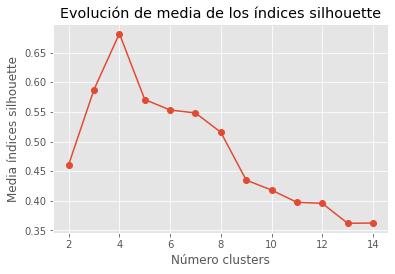

In [ ]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMedoids(
                        n_clusters   = n_clusters, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');